In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
data=pd.read_csv('EastWestAirlines.csv')

In [3]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
data.shape

(3999, 12)

In [5]:
data.head(2)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0


In [6]:
data.tail(2)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [7]:
data.drop('ID#',axis=1,inplace=True)

In [8]:
data.drop("Qual_miles",axis=1,inplace=True)

In [9]:
data.drop("Flight_trans_12",axis=1,inplace=True)

In [10]:
data.drop("Flight_miles_12mo",axis=1,inplace=True)

In [11]:
data.drop("Days_since_enroll",axis=1,inplace=True)

In [12]:
data.describe()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,2.059515,1.014504,1.012253,17144.846212,11.60190,0.370343
std,1.007757e+05,1.376919,0.147650,0.195241,24150.967826,9.60381,0.482957
min,0.000000e+00,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000
25%,1.852750e+04,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000
50%,4.309700e+04,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000
75%,9.240400e+04,3.000000,1.000000,1.000000,23800.500000,17.00000,1.000000
max,1.704838e+06,5.000000,3.000000,5.000000,263685.000000,86.00000,1.000000


In [13]:
# duplicated values
data.duplicated().sum()

17

array([[<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'cc1_miles'}>,
        <Axes: title={'center': 'cc2_miles'}>],
       [<Axes: title={'center': 'cc3_miles'}>,
        <Axes: title={'center': 'Bonus_miles'}>,
        <Axes: title={'center': 'Bonus_trans'}>],
       [<Axes: title={'center': 'Award?'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 5000x800 with 0 Axes>

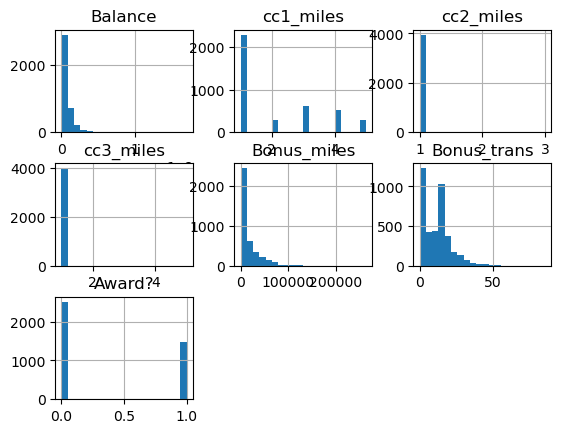

In [14]:
plt.figure(figsize=(50, 8))
data.hist(bins=20)

In [15]:
data.isna().sum()

Balance        0
cc1_miles      0
cc2_miles      0
cc3_miles      0
Bonus_miles    0
Bonus_trans    0
Award?         0
dtype: int64

<Axes: >

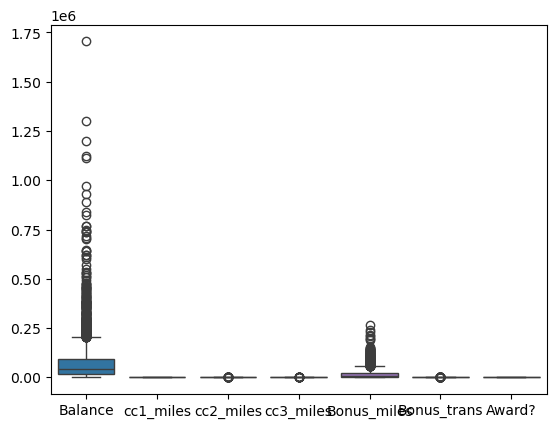

In [16]:
sns.boxplot(data)

In [17]:
# % of missingvalues
for i in data.isna().sum():
    print ((i/len(data))*100) # no missing values

0.0
0.0
0.0
0.0
0.0
0.0
0.0


## Outliers detection

In [19]:
# removing outliers

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR= Q3-Q1

data = data[~((data< (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

## Correlation matrix

In [21]:
data.corr() ## data is dynamically correlation 

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Award?
Balance,1.000000,0.392162,NaN,NaN,0.417580,0.344451,0.091210
cc1_miles,0.392162,1.000000,NaN,NaN,0.896131,0.616178,0.300345
cc2_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc3_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonus_miles,0.417580,0.896131,NaN,NaN,1.000000,0.632381,0.361490
Bonus_trans,0.344451,0.616178,NaN,NaN,0.632381,1.000000,0.282630
Award?,0.091210,0.300345,NaN,NaN,0.361490,0.282630,1.000000


<Axes: >

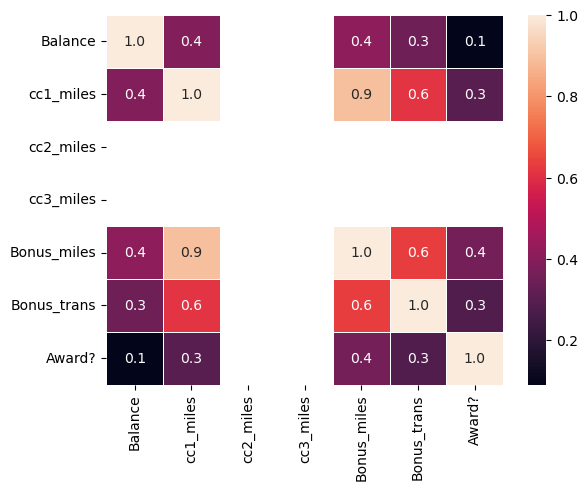

In [22]:
## correlation heatmap

sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f')

## Data PreProcessing

In [24]:
## standerdaisation

In [25]:
scaler=StandardScaler()
sc=scaler.fit_transform(data)
sc

array([[-0.50123453, -0.7097949 ,  0.        , ..., -0.81173339,
        -1.11798093, -0.69393448],
       [-0.69972086, -0.7097949 ,  0.        , ..., -0.80876625,
        -0.99324693, -0.69393448],
       [-0.20657189, -0.7097949 ,  0.        , ..., -0.52594719,
        -0.74377891, -0.69393448],
       ...,
       [ 0.51258696,  1.01449222,  0.        , ...,  1.01725487,
        -0.24484288,  1.44105824],
       [ 0.0955404 , -0.7097949 ,  0.        , ..., -0.78814101,
        -1.11798093, -0.69393448],
       [-1.0616757 , -0.7097949 ,  0.        , ..., -0.82432564,
        -1.24271494, -0.69393448]])

# Model Muilding

In [27]:
from sklearn.cluster import KMeans
cluster_range=range(1,15)
cluster_errors = [KMeans(n_clusters=n, random_state=42).fit(sc).inertia_ for n in cluster_range]
clusters_df = pd.DataFrame({"n_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df


,n_clusters,cluster_errors
0,1,17260.000000
1,2,9770.382045
2,3,8190.290560
3,4,6337.200768
4,5,5459.291509
5,6,4866.560862
6,7,4105.787378
7,8,3742.836860
8,9,3354.160031
9,10,3190.188137


In [28]:
#wcss within a cluster sum of square
wcss= []

for i in range(1,9):
    km = KMeans(n_clusters=i)
    yp=km.fit_predict(sc)
    wcss.append(km.inertia_) # within the cluster what is centroid value

In [29]:
yp

array([1, 1, 1, ..., 7, 1, 1])

In [30]:
wcss

[17260.0,
 9770.357577805291,
 7782.599316244595,
 6330.264615647118,
 5543.145435988474,
 4644.674141955251,
 4144.4695932520835,
 3743.048995211759]

In [31]:
km.cluster_centers_

array([[ 1.44942421, -0.51996513,  0.        ,  0.        , -0.41690597,
        -0.27516812, -0.69393448],
       [-0.63462271, -0.70393994,  0.        ,  0.        , -0.72416548,
        -0.93172701, -0.69393448],
       [ 0.96151192,  1.36503411,  0.        ,  0.        ,  1.14618603,
         0.8185488 , -0.69393448],
       [ 1.93444859, -0.25159273,  0.        ,  0.        ,  0.04014843,
         0.26194354,  1.44105824],
       [-0.46804849, -0.69321522,  0.        ,  0.        , -0.48003287,
        -0.50390582,  1.44105824],
       [-0.32014885, -0.34261894,  0.        ,  0.        , -0.33829688,
         0.68506346, -0.69393448],
       [ 0.50940093,  1.86231446,  0.        ,  0.        ,  2.06585465,
         1.14463594,  1.44105824],
       [-0.35704372,  0.67951925,  0.        ,  0.        ,  0.41926907,
         0.82294378,  1.44105824]])

In [32]:
plt.scatterplot(x[:,0],x[])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3406730628.py, line 1)

In [ ]:
# Yelbow graph for the sc

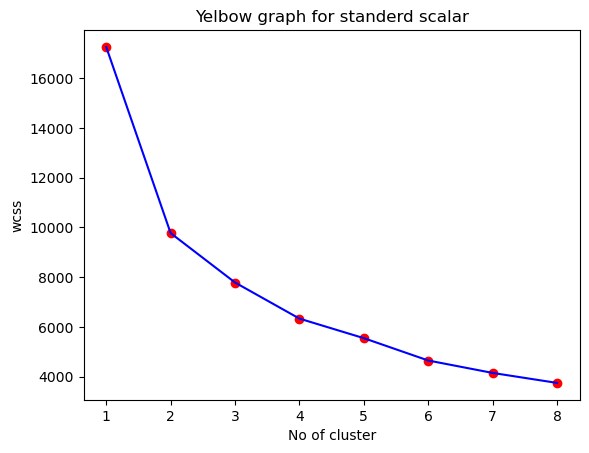

In [40]:
plt.plot(range(1,9),wcss,color="Blue")
plt.scatter(range(1,9),wcss,color="red")
plt.title("Yelbow graph for standerd scalar")
plt.xlabel("No of cluster")
plt.ylabel("wcss")
plt.show()

In [42]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(sc)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(sc, KM_est.labels_)
    s_scores.append(silhouette_avg) 

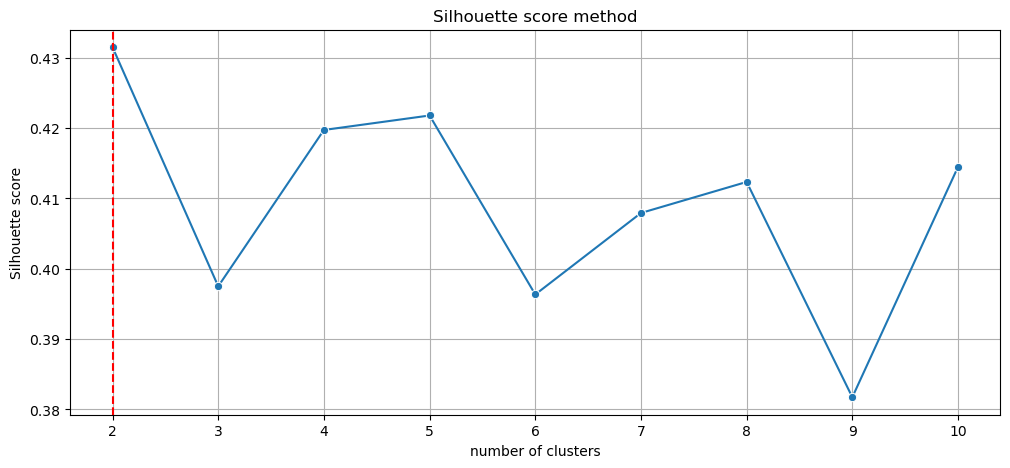

In [43]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

In [44]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.
from sklearn.metrics import silhouette_score

clust_list = [2,3,4,5,6,7,8,9]
#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(sc)
    sil_score1= (sc, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : (array([[-0.50123453, -0.7097949 ,  0.        , ..., -0.81173339,
        -1.11798093, -0.69393448],
       [-0.69972086, -0.7097949 ,  0.        , ..., -0.80876625,
        -0.99324693, -0.69393448],
       [-0.20657189, -0.7097949 ,  0.        , ..., -0.52594719,
        -0.74377891, -0.69393448],
       ...,
       [ 0.51258696,  1.01449222,  0.        , ...,  1.01725487,
        -0.24484288,  1.44105824],
       [ 0.0955404 , -0.7097949 ,  0.        , ..., -0.78814101,
        -1.11798093, -0.69393448],
       [-1.0616757 , -0.7097949 ,  0.        , ..., -0.82432564,
        -1.24271494, -0.69393448]]), array([1, 1, 1, ..., 0, 1, 1]))
For n_clusters = 3 The average silhouette_score is : (array([[-0.50123453, -0.7097949 ,  0.        , ..., -0.81173339,
        -1.11798093, -0.69393448],
       [-0.69972086, -0.7097949 ,  0.        , ..., -0.80876625,
        -0.99324693, -0.69393448],
       [-0.20657189, -0.7097949 ,  0.        ,

In [45]:
km = KMeans()
yp = km.fit_predict(sc)
yp  # 5 cluster will be possible in the k mean

array([3, 3, 3, ..., 7, 3, 3])

In [46]:
len(yp)

3452

In [47]:
km.cluster_centers_

array([[ 1.89992819, -0.53312614,  0.        ,  0.        , -0.2879072 ,
        -0.13442261,  0.1023128 ],
       [-0.28663086, -0.50302814,  0.        ,  0.        , -0.42142785,
         0.65206674, -0.69393448],
       [ 0.06290567,  1.86973864,  0.        ,  0.        ,  2.05499762,
         1.08831419,  1.44105824],
       [-0.59471932, -0.70260438,  0.        ,  0.        , -0.72009786,
        -0.9396706 , -0.69393448],
       [ 0.48844416,  1.15015948,  0.        ,  0.        ,  0.77492586,
         0.72548639, -0.69393448],
       [-0.42822489, -0.69130389,  0.        ,  0.        , -0.47447014,
        -0.50701838,  1.44105824],
       [ 2.09550951,  1.72708027,  0.        ,  0.        ,  1.83420854,
         1.06804618,  0.1665983 ],
       [-0.23046445,  0.62665864,  0.        ,  0.        ,  0.39165893,
         0.84136663,  1.44105824]])

In [54]:
sc

array([[-0.50123453, -0.7097949 ,  0.        , ..., -0.81173339,
        -1.11798093, -0.69393448],
       [-0.69972086, -0.7097949 ,  0.        , ..., -0.80876625,
        -0.99324693, -0.69393448],
       [-0.20657189, -0.7097949 ,  0.        , ..., -0.52594719,
        -0.74377891, -0.69393448],
       ...,
       [ 0.51258696,  1.01449222,  0.        , ...,  1.01725487,
        -0.24484288,  1.44105824],
       [ 0.0955404 , -0.7097949 ,  0.        , ..., -0.78814101,
        -1.11798093, -0.69393448],
       [-1.0616757 , -0.7097949 ,  0.        , ..., -0.82432564,
        -1.24271494, -0.69393448]])

In [56]:
km.cluster_centers_[:,0]

array([ 1.89992819, -0.28663086,  0.06290567, -0.59471932,  0.48844416,
       -0.42822489,  2.09550951, -0.23046445])

In [58]:
km.cluster_centers_[:,1]

array([-0.53312614, -0.50302814,  1.86973864, -0.70260438,  1.15015948,
       -0.69130389,  1.72708027,  0.62665864])

In [60]:
km.cluster_centers_[:,2]

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [62]:
km.cluster_centers_[:,3]

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [64]:
km.cluster_centers_[:,4]

array([-0.2879072 , -0.42142785,  2.05499762, -0.72009786,  0.77492586,
       -0.47447014,  1.83420854,  0.39165893])

In [66]:
km.cluster_centers_[:,5]

array([-0.13442261,  0.65206674,  1.08831419, -0.9396706 ,  0.72548639,
       -0.50701838,  1.06804618,  0.84136663])

In [68]:
km.cluster_centers_[:,6]

array([ 0.1023128 , -0.69393448,  1.44105824, -0.69393448, -0.69393448,
        1.44105824,  0.1665983 ,  1.44105824])

ValueError: Unrecognized marker style array([-0.81173339, -0.80876625, -0.52594719, ...,  1.01725487,
       -0.78814101, -0.82432564])

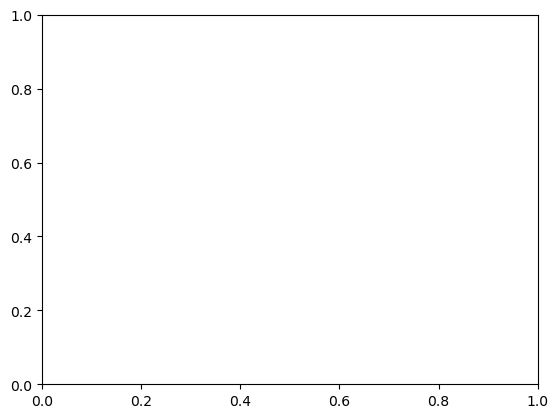

In [70]:
plt.scatter(sc[:,0],sc[:,1],sc[:,2],sc[:,3],sc[:,4],sc[:,5],sc[:,6] )
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow',s = 200)

# DBSCAN

In [ ]:
# dbscan is unsuperwised algorithom which is used to detect the outliers of the data

In [ ]:
sns.pairplot(data)

In [ ]:
from sklearn.cluster import DBSCAN  

#### model building = DBSCAN 


In [ ]:
db = DBSCAN(eps=0.5,min_samples=3)
y=db.fit_predict(sc)
y

In [ ]:
plt.scatter(sc[:,0],sc[:,4],c = y ,cmap = 'rainbow')

In [77]:
from sklearn.neighbors import NearestNeighbors

In [79]:
neigh = NearestNeighbors(n_neighbors=3).fit(sc)

In [84]:
neigh.kneighbors(sc)

(array([[0.        , 0.01344673, 0.02361112],
        [0.        , 0.00340132, 0.02446793],
        [0.        , 0.03325958, 0.04700496],
        ...,
        [0.        , 0.27864421, 0.36477852],
        [0.        , 0.04313659, 0.04340425],
        [0.        , 0.00073604, 0.00109291]]),
 array([[   0, 1971, 3140],
        [   1, 2687, 2660],
        [   2, 1478, 1691],
        ...,
        [3449, 3335, 3264],
        [3450, 1930,  335],
        [3451, 1829, 3192]], dtype=int64))

In [86]:
d,index = neigh.kneighbors(sc)

In [88]:
d

array([[0.        , 0.01344673, 0.02361112],
       [0.        , 0.00340132, 0.02446793],
       [0.        , 0.03325958, 0.04700496],
       ...,
       [0.        , 0.27864421, 0.36477852],
       [0.        , 0.04313659, 0.04340425],
       [0.        , 0.00073604, 0.00109291]])

In [90]:
d[:,1]

array([0.01344673, 0.00340132, 0.03325958, ..., 0.27864421, 0.04313659,
       0.00073604])

In [92]:
distance=np.sort(d[:,1])

In [94]:
distance

array([0.        , 0.        , 0.        , ..., 1.11242884, 1.260708  ,
       1.29088157])

Text(0.5, 1.0, 'K-Distance Graph')

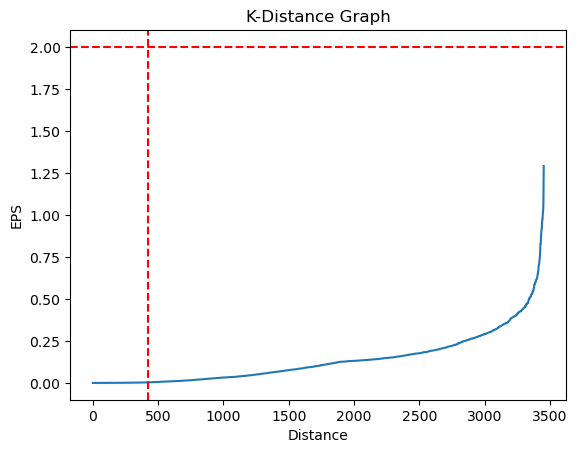

In [96]:
plt.plot(distance)
plt.axhline(y=2, linestyle = '--', color = 'red')#horrizontal Axis
plt.axvline(x=425, linestyle = '--', color = 'red')#Vertical Axis
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

In [101]:
from sklearn.cluster import DBSCAN  

# Evaluate the model

In [106]:
db = DBSCAN(eps=2.,min_samples=3)
yp = db.fit_predict(sc)
yp

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

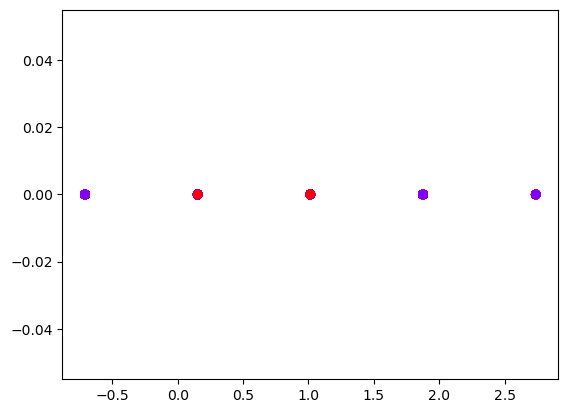

In [110]:
plt.scatter(sc[:,1],sc[:,2],c = yp, cmap='rainbow')

In [116]:
silhouette_score(sc,yp) 

0.33944655954181385

In [124]:
data['Cluster']=yp
data

C:\Users\datta\AppData\Local\Temp\ipykernel_580\4149446279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster']=yp


,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Award?,Cluster
0,28143,1,1,1,174,1,0,0
1,19244,1,1,1,215,2,0,0
2,41354,1,1,1,4123,4,0,0
3,14776,1,1,1,500,1,0,0
4,97752,4,1,1,43300,26,1,1
...,...,...,...,...,...,...,...,...
3994,18476,1,1,1,8525,4,1,1
3995,64385,1,1,1,981,5,1,1
3996,73597,3,1,1,25447,8,1,1
3997,54899,1,1,1,500,1,0,0


In [126]:
data['Cluster'].value_counts()

Cluster
0    2330
1    1122
Name: count, dtype: int64

In [130]:
data.groupby('Cluster').agg('mean')

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Award?
Cluster,,,,,,,
0,47777.778112,1.581545,1.0,1.0,7924.290129,8.390558,0.0
1,56508.484848,2.325312,1.0,1.0,18588.754011,13.228164,1.0
